In [29]:
# import required libraries and load data file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pathlib  

# Load the data
df = pd.read_csv('data/combined.csv')

# How big is this dataset?
print(df.shape)
print('This work was done by Philip!')

C:\Users\Philip\AppData\Local\Temp\ipykernel_14164\4121080076.py:10: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/combined.csv')


(1588647, 51)
This work was done by Philip!


notice the errorr that columns 29, 34, 35 and 37 have mixed data types

# 1) Data description and cleaning

In [30]:
print(df.dtypes)

BEGIN_YEARMONTH         int64
BEGIN_DAY               int64
BEGIN_TIME              int64
END_YEARMONTH           int64
END_DAY                 int64
END_TIME                int64
EPISODE_ID              int64
EVENT_ID                int64
STATE                  object
STATE_FIPS            float64
YEAR                    int64
MONTH_NAME             object
EVENT_TYPE             object
CZ_TYPE                object
CZ_FIPS                 int64
CZ_NAME                object
WFO                    object
BEGIN_DATE_TIME        object
CZ_TIMEZONE            object
END_DATE_TIME          object
INJURIES_DIRECT         int64
INJURIES_INDIRECT       int64
DEATHS_DIRECT           int64
DEATHS_INDIRECT         int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
SOURCE                 object
MAGNITUDE             float64
MAGNITUDE_TYPE         object
FLOOD_CAUSE            object
CATEGORY              float64
TOR_F_SCALE            object
TOR_LENGTH            float64
TOR_WIDTH 

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588647 entries, 0 to 1588646
Data columns (total 51 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   BEGIN_YEARMONTH     1588647 non-null  int64  
 1   BEGIN_DAY           1588647 non-null  int64  
 2   BEGIN_TIME          1588647 non-null  int64  
 3   END_YEARMONTH       1588647 non-null  int64  
 4   END_DAY             1588647 non-null  int64  
 5   END_TIME            1588647 non-null  int64  
 6   EPISODE_ID          1588647 non-null  int64  
 7   EVENT_ID            1588647 non-null  int64  
 8   STATE               1588646 non-null  object 
 9   STATE_FIPS          1588646 non-null  float64
 10  YEAR                1588647 non-null  int64  
 11  MONTH_NAME          1588647 non-null  object 
 12  EVENT_TYPE          1588647 non-null  object 
 13  CZ_TYPE             1588647 non-null  object 
 14  CZ_FIPS             1588647 non-null  int64  
 15  CZ_NAME        

In [32]:
print(df.isnull().sum())

BEGIN_YEARMONTH             0
BEGIN_DAY                   0
BEGIN_TIME                  0
END_YEARMONTH               0
END_DAY                     0
END_TIME                    0
EPISODE_ID                  0
EVENT_ID                    0
STATE                       1
STATE_FIPS                  1
YEAR                        0
MONTH_NAME                  0
EVENT_TYPE                  0
CZ_TYPE                     0
CZ_FIPS                     0
CZ_NAME                     0
WFO                         0
BEGIN_DATE_TIME             0
CZ_TIMEZONE                 0
END_DATE_TIME               0
INJURIES_DIRECT             0
INJURIES_INDIRECT           0
DEATHS_DIRECT               0
DEATHS_INDIRECT             0
DAMAGE_PROPERTY        523675
DAMAGE_CROPS           618055
SOURCE                  23114
MAGNITUDE              760023
MAGNITUDE_TYPE        1086193
FLOOD_CAUSE           1473785
CATEGORY              1588163
TOR_F_SCALE           1550655
TOR_LENGTH            1550655
TOR_WIDTH 

many of these columns are not going to be of any value to us here.  We will eliminate the unwanted columns first.  Many of the unwanted columns also have nulls.  We solve two problems by this elimination.

In [33]:
# Drop columns: 'EVENT_NARRATIVE', 'DATA_SOURCE' and 31 other columns
df = df.drop(columns=['EVENT_NARRATIVE', 'DATA_SOURCE', 'EPISODE_NARRATIVE', 'END_LON', 'END_LAT', 'BEGIN_LON', 'BEGIN_LAT', 'END_LOCATION', 'END_AZIMUTH', 'END_RANGE', 'BEGIN_LOCATION', 'BEGIN_AZIMUTH', 'BEGIN_RANGE', 'TOR_OTHER_CZ_NAME', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_WFO', 'TOR_WIDTH', 'TOR_LENGTH', 'TOR_F_SCALE', 'CATEGORY', 'FLOOD_CAUSE', 'MAGNITUDE_TYPE', 'MAGNITUDE', 'SOURCE', 'DAMAGE_CROPS', 'DAMAGE_PROPERTY', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'CZ_FIPS', 'CZ_TYPE'])

In [34]:
print(df.shape)

(1588647, 18)


In [35]:
print(df.isnull().sum())

BEGIN_YEARMONTH      0
BEGIN_DAY            0
BEGIN_TIME           0
END_YEARMONTH        0
END_DAY              0
END_TIME             0
EPISODE_ID           0
EVENT_ID             0
STATE                1
STATE_FIPS           1
YEAR                 0
MONTH_NAME           0
EVENT_TYPE           0
CZ_NAME              0
INJURIES_DIRECT      0
INJURIES_INDIRECT    0
DEATHS_DIRECT        0
DEATHS_INDIRECT      0
dtype: int64


A much more manageable dataset.  Only two columns have a null.  Probably the same row.  Let's look.

In [36]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

        BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
264567           200308         27        1220         200308       27   

        END_TIME  EPISODE_ID  EVENT_ID STATE  STATE_FIPS  YEAR MONTH_NAME  \
264567      1224     1146436   5338997   NaN         NaN  2003     August   

        EVENT_TYPE              CZ_NAME  INJURIES_DIRECT  INJURIES_INDIRECT  \
264567  Waterspout  GUAM COASTAL WATERS                0                  0   

        DEATHS_DIRECT  DEATHS_INDIRECT  
264567              0                0  


So Guam isn't really a state.  Are there other instances for Guam?

In [37]:
# Assuming df is your DataFrame and you are searching in a column named 'column_name'
guam_rows = df[df['STATE'].str.contains('Guam', na=False)]
print(guam_rows)

Empty DataFrame
Columns: [BEGIN_YEARMONTH, BEGIN_DAY, BEGIN_TIME, END_YEARMONTH, END_DAY, END_TIME, EPISODE_ID, EVENT_ID, STATE, STATE_FIPS, YEAR, MONTH_NAME, EVENT_TYPE, CZ_NAME, INJURIES_DIRECT, INJURIES_INDIRECT, DEATHS_DIRECT, DEATHS_INDIRECT]
Index: []


Apparently Guam doesn't have any other data in this dataset. 

In [38]:
df['STATE'] = df['STATE'].fillna('Guam')
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

        BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
264567           200308         27        1220         200308       27   

        END_TIME  EPISODE_ID  EVENT_ID STATE  STATE_FIPS  YEAR MONTH_NAME  \
264567      1224     1146436   5338997  Guam         NaN  2003     August   

        EVENT_TYPE              CZ_NAME  INJURIES_DIRECT  INJURIES_INDIRECT  \
264567  Waterspout  GUAM COASTAL WATERS                0                  0   

        DEATHS_DIRECT  DEATHS_INDIRECT  
264567              0                0  


I think that this dataset is almost ready.  There are a few columns to get rid of.  State fips and CZ name.  
There are several different types of time here.  Not sure that they are all useful, keeping them for now.
I also want to combine the injuries and death columns into a single deaths and injuries column

In [39]:
df = df.drop(columns=['CZ_NAME', 'STATE_FIPS'])
df['total_injuries_deaths'] = df[['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']].sum(axis=1)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588647 entries, 0 to 1588646
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   BEGIN_YEARMONTH        1588647 non-null  int64 
 1   BEGIN_DAY              1588647 non-null  int64 
 2   BEGIN_TIME             1588647 non-null  int64 
 3   END_YEARMONTH          1588647 non-null  int64 
 4   END_DAY                1588647 non-null  int64 
 5   END_TIME               1588647 non-null  int64 
 6   EPISODE_ID             1588647 non-null  int64 
 7   EVENT_ID               1588647 non-null  int64 
 8   STATE                  1588647 non-null  object
 9   YEAR                   1588647 non-null  int64 
 10  MONTH_NAME             1588647 non-null  object
 11  EVENT_TYPE             1588647 non-null  object
 12  INJURIES_DIRECT        1588647 non-null  int64 
 13  INJURIES_INDIRECT      1588647 non-null  int64 
 14  DEATHS_DIRECT          1588647 non

In [40]:
unique_states = df['STATE'].unique()
sorted_unique_states = sorted(unique_states)
print(sorted_unique_states)

['ALABAMA', 'ALASKA', 'AMERICAN SAMOA', 'ARIZONA', 'ARKANSAS', 'ATLANTIC NORTH', 'ATLANTIC SOUTH', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'E PACIFIC', 'FLORIDA', 'GEORGIA', 'GUAM', 'GUAM WATERS', 'GULF OF ALASKA', 'GULF OF MEXICO', 'Guam', 'HAWAII', 'HAWAII WATERS', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LAKE ERIE', 'LAKE HURON', 'LAKE MICHIGAN', 'LAKE ONTARIO', 'LAKE ST CLAIR', 'LAKE SUPERIOR', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'ST LAWRENCE R', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGIN ISLANDS', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']


In [41]:
states_to_remove = [
    'AMERICAN SAMOA', 'ALASKA', 'ATLANTIC NORTH', 'ATLANTIC SOUTH', 'E PACIFIC', 'GUAM', 'Guam', 
    'GUAM WATERS', 'GULF OF ALASKA', 'GULF OF MEXICO', 'HAWAII', 'HAWAII WATERS', 
    'LAKE ERIE', 'LAKE HURON', 'LAKE MICHIGAN', 'LAKE ONTARIO', 'LAKE SUPERIOR', 
    'LAKE ST CLAIR', 'PUERTO RICO', 'ST LAWRENCE R', 'ST. LAWRENCE RIVER', 'VIRGIN ISLANDS',
]

df = df[~df['STATE'].isin(states_to_remove)]

In [42]:
unique_states = df['STATE'].unique()
sorted_unique_states = sorted(unique_states)
print(sorted_unique_states)

unique_state_count = df['STATE'].nunique()
print(unique_state_count)

['ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']
49


In [43]:
unique_event_types = df['EVENT_TYPE'].unique()
print(unique_event_types)

['Thunderstorm Wind' 'Drought' 'Ice Storm' 'Hail' 'Winter Weather' 'Heat'
 'Heavy Snow' 'Winter Storm' 'Flash Flood' 'Flood' 'Tropical Storm'
 'Lightning' 'High Wind' 'Heavy Rain' 'Strong Wind' 'Tornado'
 'Cold/Wind Chill' 'Hurricane (Typhoon)' 'Lake-Effect Snow' 'Sleet'
 'Dense Fog' 'Funnel Cloud' 'Blizzard' 'Wildfire' 'Avalanche' 'Waterspout'
 'High Surf' 'Storm Surge/Tide' 'Rip Current' 'Seiche' 'Coastal Flood'
 'Dust Storm' 'Frost/Freeze' 'Dust Devil' 'Debris Flow' 'Freezing Fog'
 'Marine High Wind' 'Extreme Cold/Wind Chill' 'Excessive Heat'
 'Northern Lights' 'Volcanic Ash' 'Dense Smoke' 'Tsunami'
 'Lakeshore Flood' 'Astronomical Low Tide' 'Tropical Depression'
 'Sneakerwave' 'Hurricane']


In [44]:
event_types_to_keep = ['Thunderstorm Wind', 'Hail', 'Lightning', 'High Wind', 'Strong Wind', 'Tornado']

df = df[df['EVENT_TYPE'].isin(event_types_to_keep)]

unique_event_types = df['EVENT_TYPE'].unique()
print(unique_event_types)

['Thunderstorm Wind' 'Hail' 'Lightning' 'High Wind' 'Strong Wind'
 'Tornado']


Now we have the lower 48 states and DC, no nulls, and Thunderstorm related events.  I think that we are ready.

# 2) Start the EDA

In [45]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 865841 entries, 0 to 1588646
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   BEGIN_YEARMONTH        865841 non-null  int64 
 1   BEGIN_DAY              865841 non-null  int64 
 2   BEGIN_TIME             865841 non-null  int64 
 3   END_YEARMONTH          865841 non-null  int64 
 4   END_DAY                865841 non-null  int64 
 5   END_TIME               865841 non-null  int64 
 6   EPISODE_ID             865841 non-null  int64 
 7   EVENT_ID               865841 non-null  int64 
 8   STATE                  865841 non-null  object
 9   YEAR                   865841 non-null  int64 
 10  MONTH_NAME             865841 non-null  object
 11  EVENT_TYPE             865841 non-null  object
 12  INJURIES_DIRECT        865841 non-null  int64 
 13  INJURIES_INDIRECT      865841 non-null  int64 
 14  DEATHS_DIRECT          865841 non-null  int64 
 15  DEAT

In [46]:
print(df.describe())

       BEGIN_YEARMONTH      BEGIN_DAY     BEGIN_TIME  END_YEARMONTH  \
count    865841.000000  865841.000000  865841.000000  865841.000000   
mean     201111.129620      15.680162    1500.052070  201111.129620   
std         759.937669       8.784279     540.061824     759.937669   
min      199801.000000       1.000000       0.000000  199801.000000   
25%      200505.000000       8.000000    1315.000000  200505.000000   
50%      201105.000000      15.000000    1620.000000  201105.000000   
75%      201804.000000      23.000000    1845.000000  201804.000000   
max      202406.000000      31.000000    2359.000000  202406.000000   

             END_DAY       END_TIME    EPISODE_ID      EVENT_ID  \
count  865841.000000  865841.000000  8.658410e+05  8.658410e+05   
mean       15.701210    1525.256082  4.915259e+05  2.110182e+06   
std         8.783655     532.538731  6.272493e+05  2.266323e+06   
min         1.000000       0.000000  2.000000e+00  5.000000e+00   
25%         8.000000    1

In [47]:
print(df.isnull().sum())

BEGIN_YEARMONTH          0
BEGIN_DAY                0
BEGIN_TIME               0
END_YEARMONTH            0
END_DAY                  0
END_TIME                 0
EPISODE_ID               0
EVENT_ID                 0
STATE                    0
YEAR                     0
MONTH_NAME               0
EVENT_TYPE               0
INJURIES_DIRECT          0
INJURIES_INDIRECT        0
DEATHS_DIRECT            0
DEATHS_INDIRECT          0
total_injuries_deaths    0
dtype: int64


In [48]:
# How many of each event type by state?
event_type_by_state = df.groupby(['EVENT_TYPE', 'STATE']).size().reset_index(name='count')
print(event_type_by_state)

    EVENT_TYPE          STATE  count
0         Hail        ALABAMA   5894
1         Hail        ARIZONA    927
2         Hail       ARKANSAS   8130
3         Hail     CALIFORNIA    757
4         Hail       COLORADO  11381
..         ...            ...    ...
289    Tornado       VIRGINIA    571
290    Tornado     WASHINGTON     65
291    Tornado  WEST VIRGINIA     95
292    Tornado      WISCONSIN    782
293    Tornado        WYOMING    271

[294 rows x 3 columns]


In [51]:
# Assuming df is your DataFrame
# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Group by state and count the number of tornadoes
tornado_counts = tornado_df.groupby('STATE').size().reset_index(name='count')

# Sort the results to find the states with the most tornadoes
sorted_tornado_counts = tornado_counts.sort_values(by='count', ascending=False)

# Print the states with the most tornadoes
print("States with the most tornadoes:")
print(sorted_tornado_counts.head())

# Print the states with the least tornadoes
print("\nStates with the least tornadoes:")
print(sorted_tornado_counts.tail())

States with the most tornadoes:
          STATE  count
41        TEXAS   3625
14       KANSAS   2448
34     OKLAHOMA   2156
0       ALABAMA   1956
22  MISSISSIPPI   1950

States with the least tornadoes:
                   STATE  count
27         NEW HAMPSHIRE     34
6               DELAWARE     22
43               VERMONT     18
37          RHODE ISLAND     12
7   DISTRICT OF COLUMBIA      5


In [58]:
# Assuming df is your DataFrame
# Filter for thunderstorm wind events
thunderstorm_wind_df = df[df['EVENT_TYPE'] == 'Thunderstorm Wind']

# Group by state and count the number of thunderstorm wind events
thunderstorm_wind_counts = thunderstorm_wind_df.groupby('STATE').size().reset_index(name='count')

# Sort the results to find the states with the most thunderstorm wind events
sorted_thunderstorm_wind_counts = thunderstorm_wind_counts.sort_values(by='count', ascending=False)

# Print the states with the most thunderstorm wind events
print("States with the most thunderstorm wind events:")
print(sorted_thunderstorm_wind_counts.head())

# Print the states with the least thunderstorm wind events
print("\nStates with the least thunderstorm wind events:")
print(sorted_thunderstorm_wind_counts.tail())

States with the most thunderstorm wind events:
           STATE  count
41         TEXAS  22588
14        KANSAS  18200
9        GEORGIA  17317
36  PENNSYLVANIA  16625
44      VIRGINIA  16118

States with the least thunderstorm wind events:
                   STATE  count
26                NEVADA    746
45            WASHINGTON    473
35                OREGON    398
7   DISTRICT OF COLUMBIA    266
37          RHODE ISLAND    260


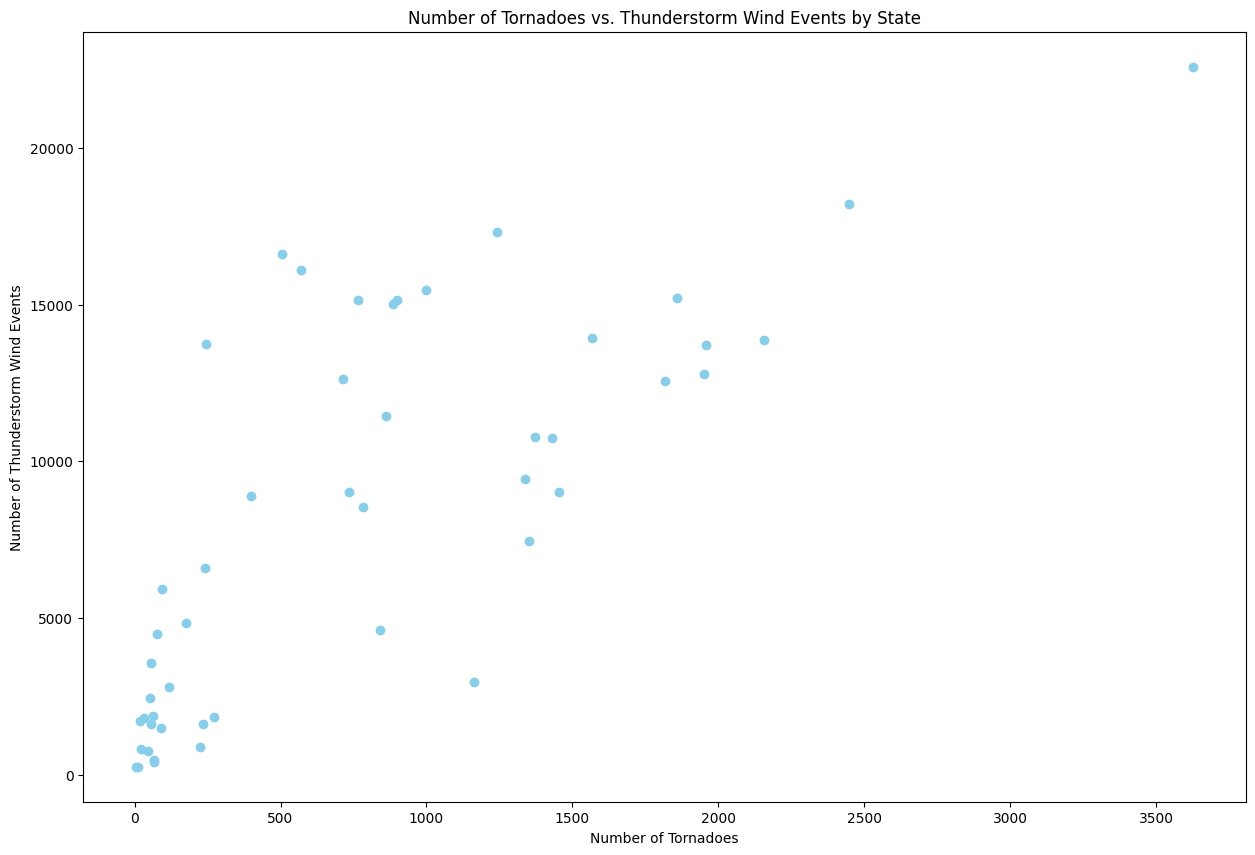

In [60]:
# Assuming df is your DataFrame
# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Filter for thunderstorm wind events
thunderstorm_wind_df = df[df['EVENT_TYPE'] == 'Thunderstorm Wind']

# Check if the filtered DataFrames are empty
if tornado_df.empty:
    print("No tornado events found in the DataFrame.")
if thunderstorm_wind_df.empty:
    print("No thunderstorm wind events found in the DataFrame.")

# Group by state and count the number of tornadoes
tornado_counts_by_state = tornado_df.groupby('STATE').size().reset_index(name='tornado_count')

# Group by state and count the number of thunderstorm wind events
thunderstorm_wind_counts_by_state = thunderstorm_wind_df.groupby('STATE').size().reset_index(name='thunderstorm_wind_count')

# Merge the two DataFrames on the state column
merged_counts = pd.merge(tornado_counts_by_state, thunderstorm_wind_counts_by_state, on='STATE', how='inner')

# Check if the merged DataFrame is empty
if merged_counts.empty:
    print("No common states found between tornado and thunderstorm wind events.")

# Plot the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(merged_counts['tornado_count'], merged_counts['thunderstorm_wind_count'], color='skyblue')
plt.xlabel('Number of Tornadoes')
plt.ylabel('Number of Thunderstorm Wind Events')
plt.title('Number of Tornadoes vs. Thunderstorm Wind Events by State')
plt.show()

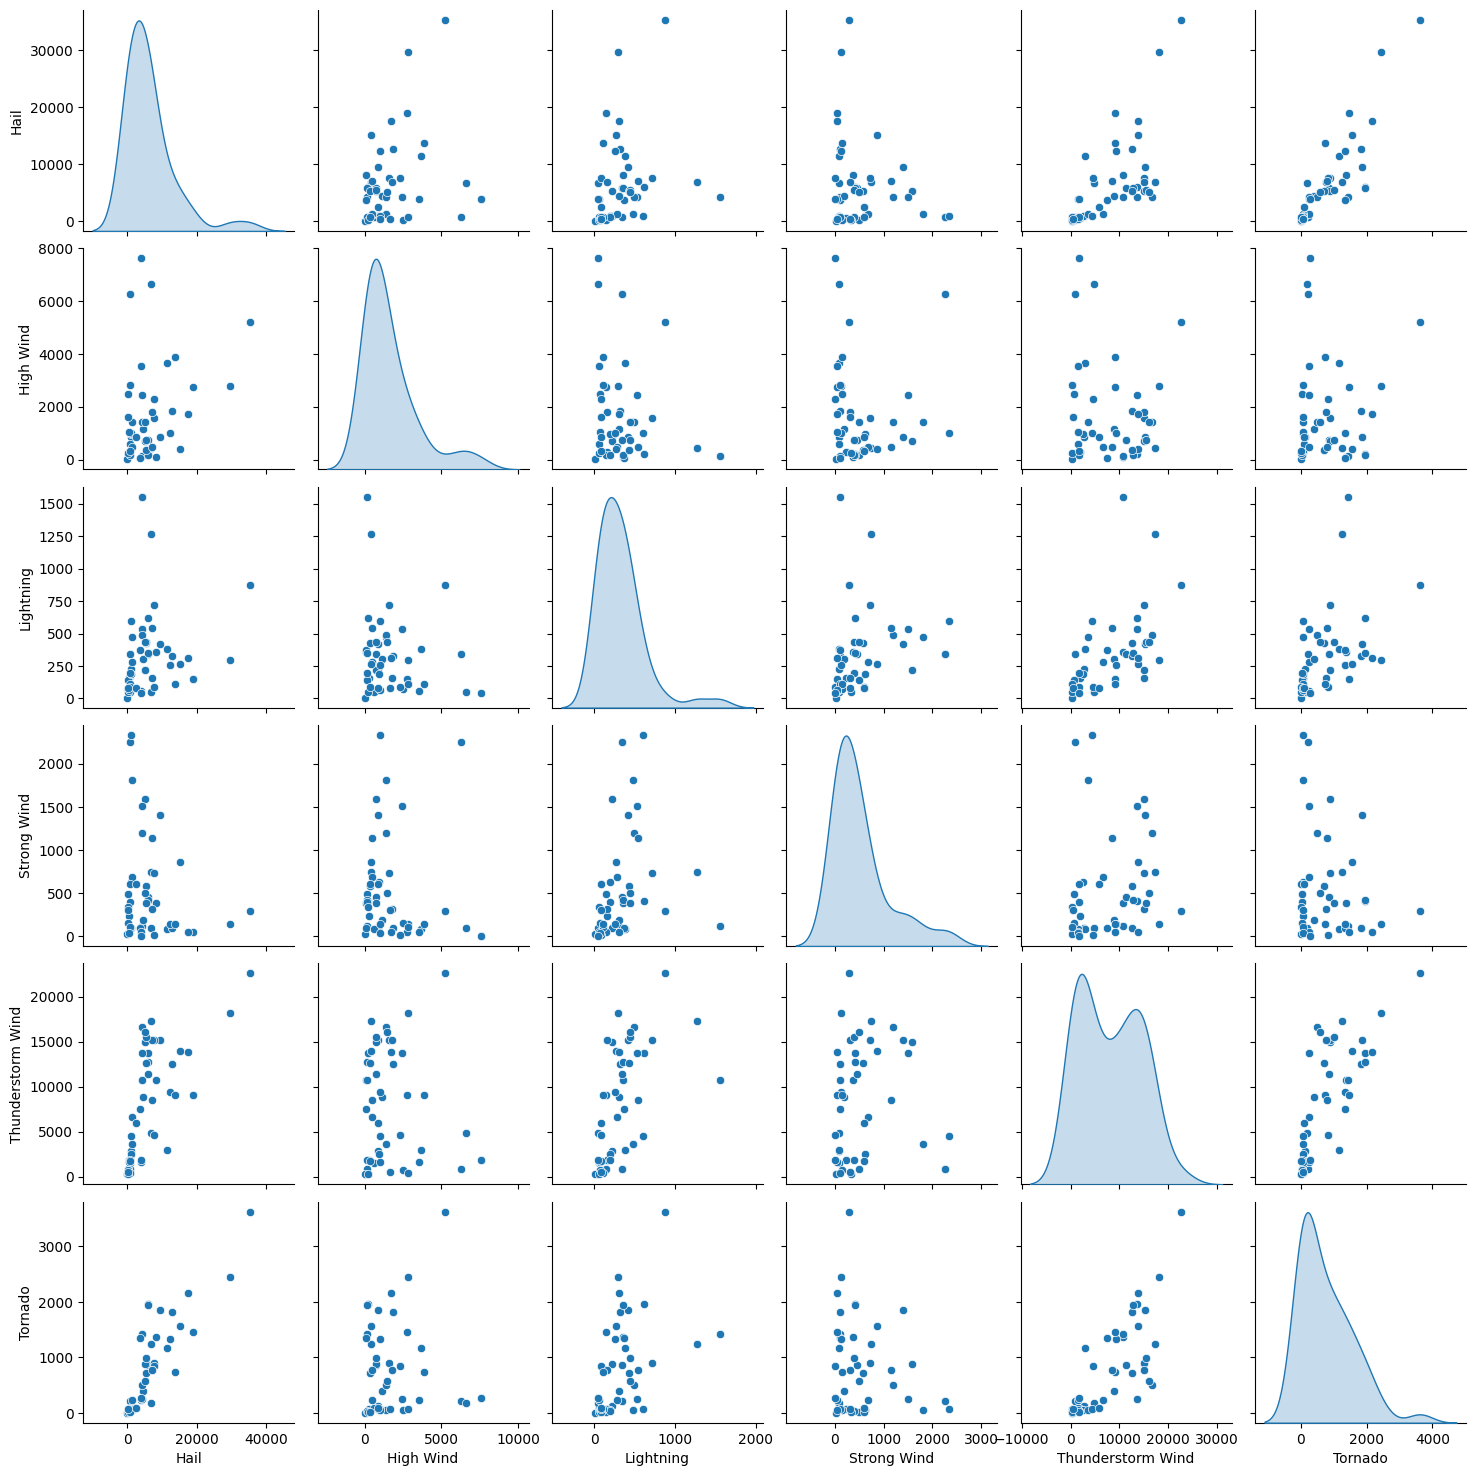

In [62]:
# Assuming df is your DataFrame
# Pivot the DataFrame to create a matrix of event counts by state
event_counts_by_state = df.pivot_table(index='STATE', columns='EVENT_TYPE', aggfunc='size', fill_value=0)

# Reset the index to convert the pivot table into a DataFrame
event_counts_by_state.reset_index(inplace=True)

# Create the pairplot
sns.pairplot(event_counts_by_state, diag_kind='kde')

# Show the plot
plt.show()

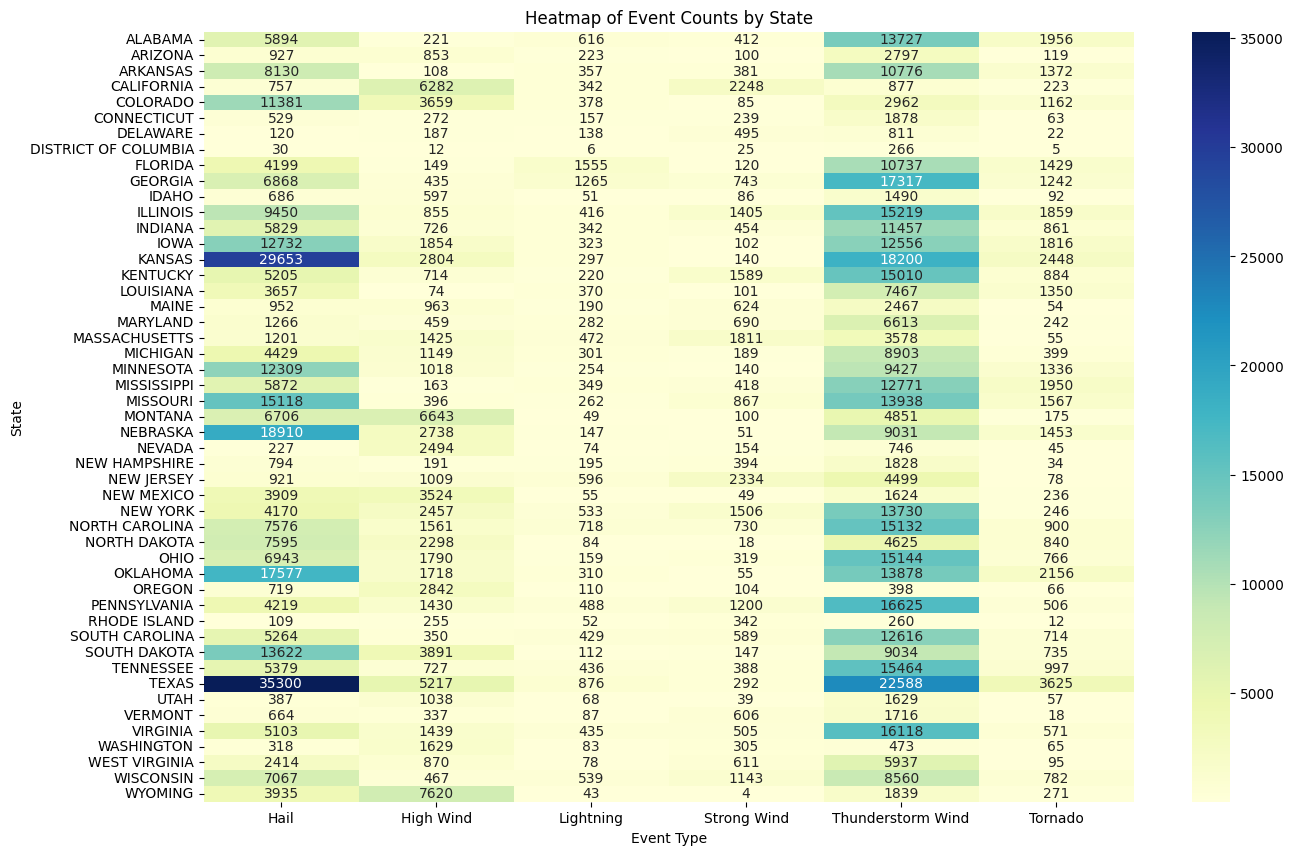

In [63]:
# Assuming df is your DataFrame
# Pivot the DataFrame to create a matrix of event counts by state
event_counts_by_state = df.pivot_table(index='STATE', columns='EVENT_TYPE', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(event_counts_by_state, cmap='YlGnBu', annot=True, fmt='d')

# Add title and labels
plt.title('Heatmap of Event Counts by State')
plt.xlabel('Event Type')
plt.ylabel('State')

# Show the plot
plt.show()

This was not the table that I was expecting to make.  I am leaving this here for now because I am intrigued by the heatmap and want to stare at it some more to determine what information I can glean.

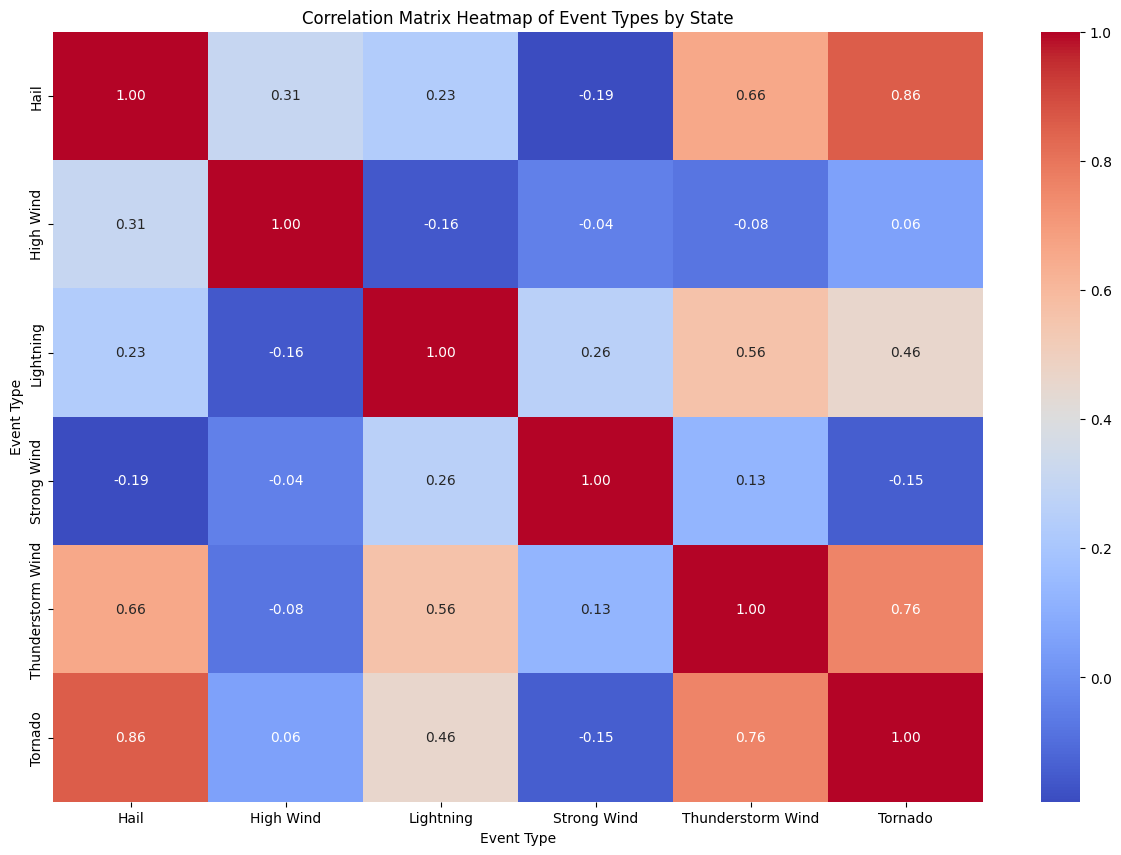

In [64]:
# Assuming df is your DataFrame
# Pivot the DataFrame to create a matrix of event counts by state
event_counts_by_state = df.pivot_table(index='STATE', columns='EVENT_TYPE', aggfunc='size', fill_value=0)

# Compute the correlation matrix
correlation_matrix = event_counts_by_state.corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Add title and labels
plt.title('Correlation Matrix Heatmap of Event Types by State')
plt.xlabel('Event Type')
plt.ylabel('Event Type')

# Show the plot
plt.show()

This is the heat map that I was trying to make before.  Tornadoes are associated with Thunderstorms and lightning.  High winds and strong winds can result from other types of storms besides thunderstorms.  Thus, it does make sense that the correlation is quite low for strong winds.  Note: the first set of metadata for this dataset did not provide very good descriptions of the distinction between the different types of wind.  It was only later that I found a much more detailed set of metadata that explained the differences between the wind types.  Had I known earlier, I would have excluded high wind and strong wind as they are not related to thunderstorms.  

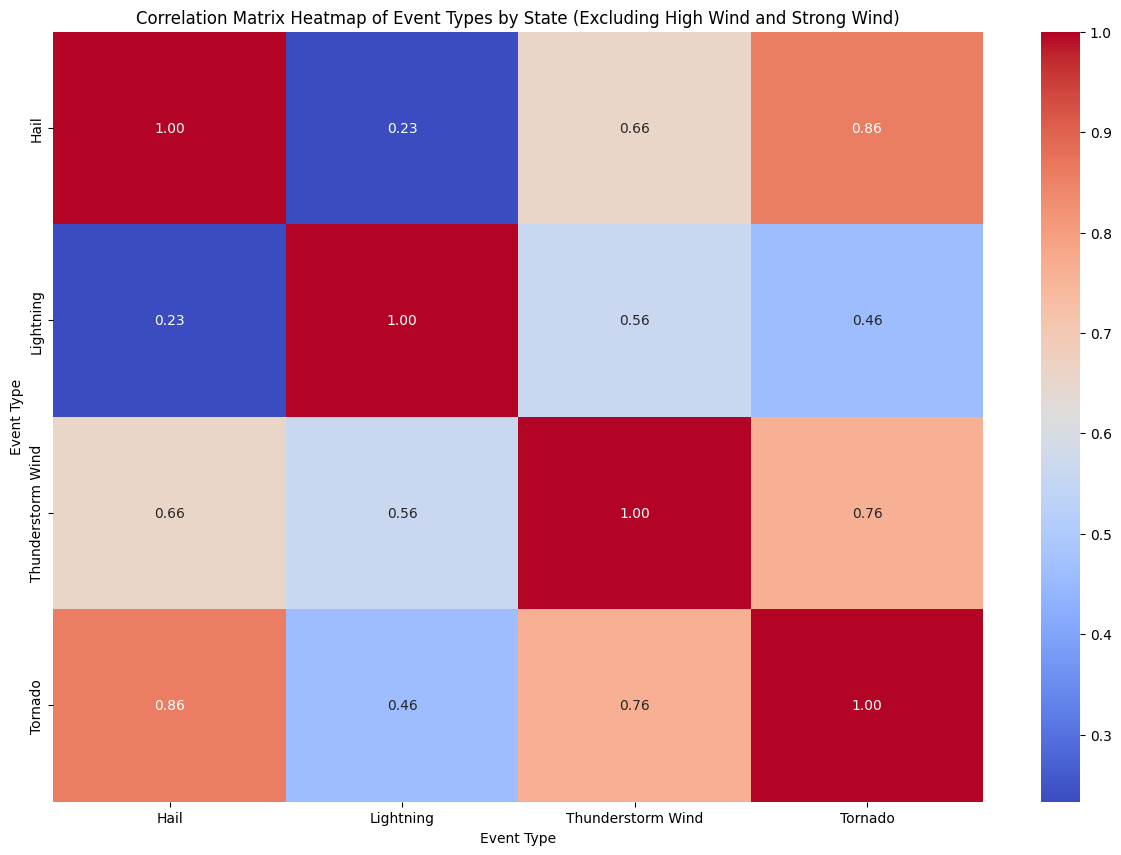

In [65]:
# Assuming df is your DataFrame
# Filter out "High Wind" and "Strong Wind" events
filtered_df = df[~df['EVENT_TYPE'].isin(['High Wind', 'Strong Wind'])]

# Pivot the DataFrame to create a matrix of event counts by state
event_counts_by_state = filtered_df.pivot_table(index='STATE', columns='EVENT_TYPE', aggfunc='size', fill_value=0)

# Compute the correlation matrix
correlation_matrix = event_counts_by_state.corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Add title and labels
plt.title('Correlation Matrix Heatmap of Event Types by State (Excluding High Wind and Strong Wind)')
plt.xlabel('Event Type')
plt.ylabel('Event Type')

# Show the plot
plt.show()


Same as the previous heatmap.  But now we can see the event types that are of interest to us, namely those related to thunderstorms.

# 3) Maps

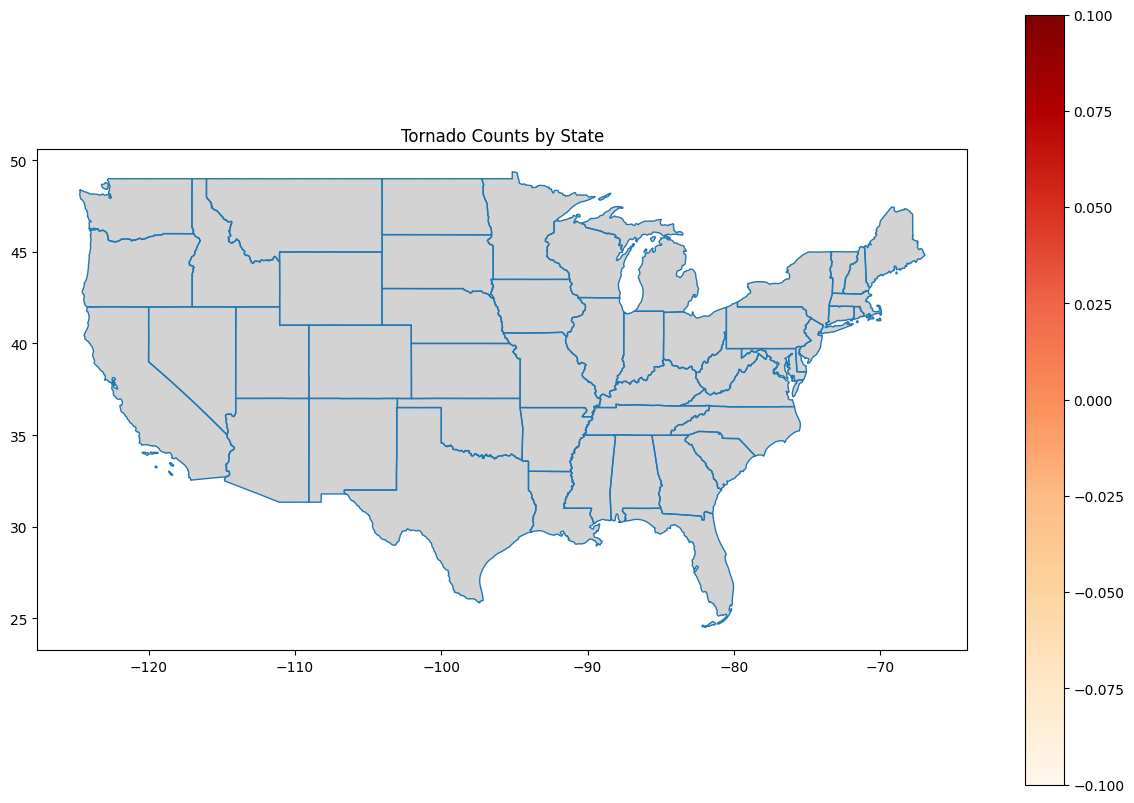

In [66]:
# Assuming df is your DataFrame
# Filter for tornado events
tornado_df = df[df['EVENT_TYPE'] == 'Tornado']

# Check if the filtered DataFrame is empty
if tornado_df.empty:
    print("No tornado events found in the DataFrame.")

# Group by state and count the number of tornadoes
tornado_counts_by_state = tornado_df.groupby('STATE').size().reset_index(name='count')

# Load the shapefile for US states
shapefile_path = 'shp/cb_2018_us_state_20m.shp'
gdf = gpd.read_file(shapefile_path)

# List of state abbreviations for the 48 contiguous US states
contiguous_states = [
    'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 
    'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# Filter the GeoDataFrame to include only the contiguous states
gdf_contiguous = gdf[gdf['STUSPS'].isin(contiguous_states)]

# Merge the tornado data with the state geometries
merged = gdf_contiguous.merge(tornado_counts_by_state, left_on='STUSPS', right_on='STATE', how='left')

# Check if the merged DataFrame is empty
if merged.empty:
    print("No common states found between the shapefile and tornado data.")

# Check for missing geometries
merged = merged[merged.geometry.notnull()]

# Validate geometries
merged = merged[merged.is_valid]

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_contiguous.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})

plt.title('Tornado Counts by State')
plt.show()